# Compute performance metrics for the given Y and Y_score without sklearn

In [4]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
# write your code here
data = pd.read_csv('5_a.csv')
print(data.shape)
data['output'] = np.where(data['proba']<0.5, 0, 1)
print(data.head())
# data.head(10000)
TP = len(data[(data['output']==1) & (data['y']==1)])
TN = len(data[(data['output']==0) & (data['y']==0)])
FP = len(data[(data['output']==1) & (data['y']==0)])
FN = len(data[(data['output']==0) & (data['y']==1)])
# print(TP)
print('TP: {}; TN:{}; FP:{}; FN:{}'.format(TP,TN,FP,FN))

precision = TP/(TP + FP)
recall = TP/(TP + FN)
print("Precision : {} Recall:{}".format(precision,recall))

f1_score = 2*precision*recall/(precision + recall)
print("F1 Score: ",f1_score)

accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy: ",accuracy)

(10100, 2)
     y     proba  output
0  1.0  0.637387       1
1  1.0  0.635165       1
2  1.0  0.766586       1
3  1.0  0.724564       1
4  1.0  0.889199       1
10000: 0 :100 : 0
Precision : 0.9900990099009901 Recall:1.0
F1 Score:  0.9950248756218906
Accuracy:  0.9900990099009901


In [8]:
import random
# Generate n random value between a and b
def get_n_unique_random_value(a,b,n):
    return random.sample(range(a,b),n)

In [4]:
n = 10
Size = data.shape[0]
Threshold_index = get_n_unique_random_value(0,Size,n)
Threshold_values = [data.iloc[i]['proba'] for i in Threshold_index]
Threshold_values.sort()
# print(Threshold_values)

for thres in Threshold_values:
    data['output'+str(Threshold_values.index(thres))] = np.where(data['proba']<thres, 0, 1)
# print(data.head)

tpr = []
fpr = []

for thres in Threshold_values:
    TP = len(data[(data['output'+str(Threshold_values.index(thres))]==1) & (data['y']==1)])
    TN = len(data[(data['output'+str(Threshold_values.index(thres))]==0) & (data['y']==0)])
    FP = len(data[(data['output'+str(Threshold_values.index(thres))]==1) & (data['y']==0)])
    FN = len(data[(data['output'+str(Threshold_values.index(thres))]==0) & (data['y']==1)])
#     print("TP:",true_positive)
#     print("TN:",true_negative)
#     print("FP:",false_positive)
#     print("FN:",false_negative)
    tpr.append(TP/(TP + FN))
    fpr.append(FP/(FP + TN))
print(tpr)
print(fpr)

[0.7283, 0.6381, 0.4133, 0.2946, 0.2573, 0.247, 0.2364, 0.161, 0.0308, 0.0067]
[0.75, 0.64, 0.44, 0.29, 0.27, 0.25, 0.25, 0.18, 0.03, 0.0]


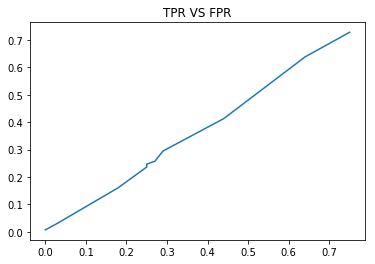

0.272803


In [18]:
import matplotlib.pyplot as plt

# plt.plot(neighbors,trainscores, label='TPR')
plt.plot(fpr,tpr)
plt.title('TPR VS FPR')
# plt.legend()
plt.show()

In [20]:
tpr.sort()
fpr.sort()
print(np.trapz(tpr,fpr))

0.272803


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [23]:
# write your code
data = pd.read_csv('5_b.csv')
print(data.shape)
data['output'] = np.where(data['proba']<0.5, 0, 1)
print(data.head())
# data.head(10000)
TP = len(data[(data['output']==1) & (data['y']==1)])
TN = len(data[(data['output']==0) & (data['y']==0)])
FP = len(data[(data['output']==1) & (data['y']==0)])
FN = len(data[(data['output']==0) & (data['y']==1)])
# print(TP)
print('TP: {}; TN:{}; FP:{}; FN:{}'.format(TP,TN,FP,FN))

precision = TP/(TP + FP)
recall = TP/(TP + FN)
print("Precision : {} Recall:{}".format(precision,recall))

f1_score = 2*precision*recall/(precision + recall)
print("F1 Score: ",f1_score)

accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy: ",accuracy)

(10100, 2)
     y     proba  output
0  0.0  0.281035       0
1  0.0  0.465152       0
2  0.0  0.352793       0
3  0.0  0.157818       0
4  0.0  0.276648       0
TP: 55; TN:9761; FP:239; FN:45
Precision : 0.1870748299319728 Recall:0.55
F1 Score:  0.2791878172588833
Accuracy:  0.9718811881188119


In [39]:
n = 10
Size = data.shape[0]
Threshold_index = get_n_unique_random_value(0,Size,n)
Threshold_values = [data.iloc[i]['proba'] for i in Threshold_index]
Threshold_values.sort()
print(Threshold_values)

for thres in Threshold_values:
    data['output'+str(Threshold_values.index(thres))] = np.where(data['proba']<thres, 0, 1)
# print(data.head)

tpr = []
fpr = []

for thres in Threshold_values:
    TP = len(data[(data['output'+str(Threshold_values.index(thres))]==1) & (data['y']==1)])
    TN = len(data[(data['output'+str(Threshold_values.index(thres))]==0) & (data['y']==0)])
    FP = len(data[(data['output'+str(Threshold_values.index(thres))]==1) & (data['y']==0)])
    FN = len(data[(data['output'+str(Threshold_values.index(thres))]==0) & (data['y']==1)])
#     print("TP:",true_positive)
#     print("TN:",true_negative)
#     print("FP:",false_positive)
#     print("FN:",false_negative)
    tpr.append(TP/(TP + FN))
    fpr.append(FP/(FP + TN))
print(tpr)
print(fpr)

[0.15907694610510129, 0.20544830870351813, 0.21543849755730554, 0.2835889883568202, 0.300195278702444, 0.3096057715181111, 0.34436322740273906, 0.3954191598075785, 0.45012154717802705, 0.5026531715044368]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.79, 0.55]
[0.8532, 0.7363, 0.7113, 0.5429, 0.5028, 0.4812, 0.4027, 0.2788, 0.1454, 0.0178]


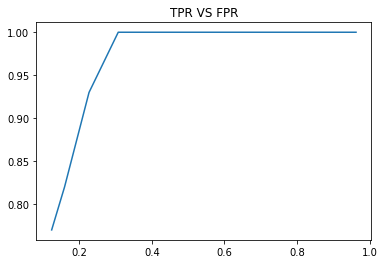

In [32]:
import matplotlib.pyplot as plt

# plt.plot(neighbors,trainscores, label='TPR')
plt.plot(fpr,tpr)
plt.title('TPR VS FPR')
# plt.legend()
plt.show()

In [38]:
tpr.sort()
fpr.sort()
print(np.trapz(tpr,fpr))

0.8195835


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [6]:
# write your code
data = pd.read_csv('5_c.csv')
data.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [9]:
n = 10
Size = data.shape[0]
Threshold_index = get_n_unique_random_value(0,Size,n)
Threshold_values = [data.iloc[i]['prob'] for i in Threshold_index]
Threshold_values.sort()
print(Threshold_values)

for thres in Threshold_values:
    data['output'+str(Threshold_values.index(thres))] = np.where(data['prob']<thres, 0, 1)
# print(data.head)

FP = []
FN = []

for thres in Threshold_values:
#     TP = len(data[(data['output'+str(Threshold_values.index(thres))]==1) & (data['y']==1)])
#     TN = len(data[(data['output'+str(Threshold_values.index(thres))]==0) & (data['y']==0)])
    FP.append(len(data[(data['output'+str(Threshold_values.index(thres))]==1) & (data['y']==0)]))
    FN.append(len(data[(data['output'+str(Threshold_values.index(thres))]==0) & (data['y']==1)]))
#     print("TP:",true_positive)
#     print("TN:",true_negative)
#     print("FP:",false_positive)
#     print("FN:",false_negative)
#     tpr.append(TP/(TP + FN))
#     fpr.append(FP/(FP + TN))
print(FP)
print(FN)

[0.12455980358897036, 0.16171157803084402, 0.17571705096476786, 0.17955941042384582, 0.2377404143681397, 0.25478729102257136, 0.3462788970083803, 0.3876721927443065, 0.44782194978482015, 0.6716328037751688]
[1541, 1367, 1284, 1260, 984, 909, 563, 437, 259, 19]
[14, 33, 42, 48, 90, 103, 221, 278, 373, 790]


In [17]:
roc = 99999999
for thres in Threshold_values:
#     print(Threshold_values.index(thres))
    new_roc = 500*FN[Threshold_values.index(thres)] + 100*FP[Threshold_values.index(thres)]
#     print('FN: {}, FP: {}'.format(FN[Threshold_values.index(thres)],FP[Threshold_values.index(thres)]))
#     print(new_roc)
    if new_roc < roc:
        roc = new_roc
        best_thres = thres
print('ROC: {} Thres:{}'.format(roc,best_thres))

ROC: 142400 Thres:0.25478729102257136


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>